# Futures Price Predictor Version 0.1

### This project idea was inspired by the movie "The Social Network" scene in which Zuckerberg's character is talking to a friend explaining the $300,000 a friend made by finding the correlation between heating oil futures and meteorology. We will attempt a similar model to predict the heating oil or natural gas futures prices given weather data, as well as other predictors.


<center><img src="Soial_Network.jpg"></center> 
<br>
<h3><i><center>The Social Network</center>
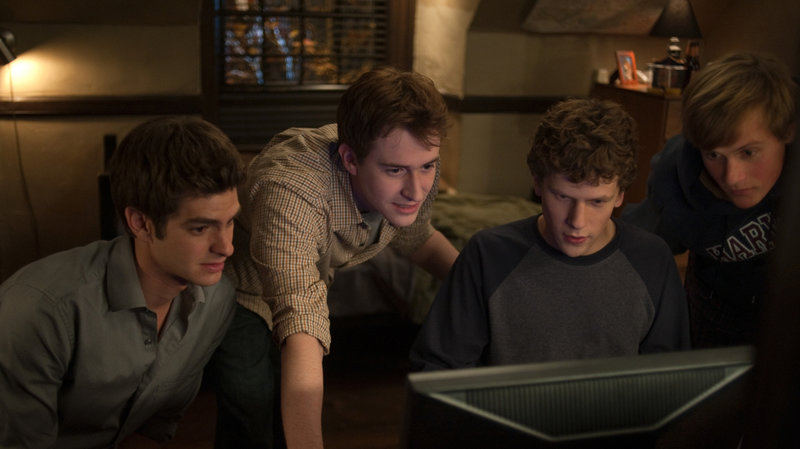

# Sections:
## 1. [Hypothesis](#Hypothesis)
## 2. [Research](#Research)
## 3. [Data Needed](#Data-Needed)
## 4. [Initial Model Selections](#Initial-Model-Selection)
## 5. [Data Wranglin'](#Data_Wranglin)
<br>

<a id='Hypothesis'></a>
## 1. Hypothesis

#### The hypothesis we are testing is whether or not futures prices target variable can be predicted given various predictor variables that will initially consist of (and adjusted based on historical correlation):

 - Weather Patterns (in the contiguous United States, or other countries (exports) given additional findings)
 - Other futures spot prices
 - GDP measures of various countries
 - Weather sentiment (web scraper for positive/negative weather reports in future)
 - Farmer's Almanac predictors
 <br>

<a id='Research'></a>
## 2. Research

#### This research section will explore some of the assumptions I have made, identify possible data sets that I have not identified for inclusion going forward, and look for ways to limit our data to provide meaningful insights (e.g. which part of the country has the largest market share of heating oil or natural gas, and therefore the most influence on commodity demand given supply. Also are there unidentified metrics like crude oil production that may influence heating oil and natural gas prices? 

### <u>Heating Oil</U>

#### "The legal difference between diesel and heating oil in US is sulfur allowance (<15ppm for diesel, <500ppm for heating oil)" - https://en.wikipedia.org/wiki/Heating_oil
This may useful info for using diesel as a close proxy for heating oil predictors where needed. 

#### Known as No.2 Heating Oil in US. Heating oil futures contracts trade in units of 1,000 barrels with minimum fluctuation of $0.0001 per gallon, based on delivery in NY Harbor. CME 

#### Crude costs highly affect heating oil prices, distilled from crude - EIA
Need to ensure crude oil data is being used alongside to predict. This will help since OPEC decisions on outputs are generally agreed upon and stated publicly, whether or not that is actually the case. 

#### 3.11 billion gallons sold residentially to US Northeast in 2018 - EIA

#### In US, Northeast accounts for 82% of all household consumers. - EIA
#### 2018, 35% of total commercial sector distillate fuel oil consumption was in US Norhteast. - EIA

#### EIA PADD (Petro Admin for Defense Districts):
#### PADD 1A, NE: ME, VT, NH, MA, RI, CT
#### PADD 1B, CentAtl: NY, PA, NJ, DE, MD 

#### While ignoring other parts of the country, or hidden uses of heating oil, I will focus the heating oil predictors on these states within the United States since they account for such a large market share of heating oil. 

#### Next, I will look at natural gas as well, which is top in residential energy sector, with 58% of homes in the US using natural gas for heating. - EIA

### <u>Natural Gas</U>

#### Natural Gas use in US by sector - EIA
electric power - 35%,
industrial - 33%,
residential - 17%,
commercial - 12%,
transportation - 3%

#### Since such a large amount of natural gas is used, EIA cites that increases in temperatures can also affect natural gas prices upwards, thus making it more difficult to gauge if correlation is positive or negative. This may be overcome by using the absolute difference from the average temperature over that period of time? But at this point I am not sure I want to use natural gas as a seperate target variable on top of the model for heating oil.

<a id='Data-Needed'></a>
## 3. Data Needed

### Weather Patterns

#### We will look at obtaining a weather pattern predictor that is already pre-built. The most important data subset will the predicted average daily temperatures for any part of the country. This will be used in the model as a predictor variable in our 2nd stage model, not in our predictor variables for training the intial regression model on.

#### Additionally, we will need to obtain historical weather data for the U.S. for the predictor variable in our intial model.

### Futures Prices

####  We will need to obtain historical futures prices to train our model on. Hopefully we will be able to obtain the same date ranges as weather.

### GDP Measures

#### One hypothesis is that the higher the GDP output of the countries of the world are, the higher the prices of heating oil or natural gas will be in order to provide heat in the homes of persons able to pay for it. As demand for home ameniites increase as wealth increases across the globe, this should result in higher prices for a finite good like oil or natural gas (we will test this assumption).

#### We will need to obtain historical GDP output of countries in the world in the same date range as our spot prices and weather data.

### Weather Sentiment

#### I believe that since heating oil and natural gas are bought in bulk by the average homeowner, severe weather predictions for winter months in the United States will result in increased demand, and thus higher spot prices. 

#### We will need to create a web scraper for weather sentiment analysis. This will be difficult to fine tune given the amount of weather articles and keywords that will identify the news as postive or negative, as well as identifying if the news article is speaking to weather in the coming days, or the coming months. 
### This will be done in multiple steps:

 1. Is the weather report positive or negative?
 2. Is the weather report for near-term or long-term timeframe?
 3. Is the weather report for a particular geographical location in the US that will indeed experience colder weather?
 4. Additional Fine Tuning and preditors to be explored.
 

### Farmers Almanac Data

#### We will look at incorporating Farmers Almanac predictors as an additional data set.
#### The accuracy of the historical Farmers Almanac data will be assessed to see if it can supply meaningful data points to the 2nd stage model that will predict spot prices.
#### The future predictions in the most recent Farmers Almanac will be needed in order to incorporate as a predictor variable in our 2nd stage model.

<a id='Initial-Model-Selection'></a>
## 4. Initial Model Selections

#### Since we have various models feeding our final target variable, we will list them below:

 - 1st Stage Model: Spot price predictor. We will explore a regression model, whether it is one single random forest regressor, or a combination of other regressors and averaging the results for each respective model prediction. We will begin with a random forest regressor since it can be easily implemented with scikit, the slow computational time is not a concern since futures prices are not as volatile as somehting like virtual currency, and the estimates generally avoid overfitting given the nature of random forests to reduce variance by combining numerous outputs from numerous decision trees. Additionally a random forest regressor does not require us to normalize our data, thus saving us some data preprocessing work. However, I may do this regardless if we decide to incorporate other regressor models like SGD and should not affect the RF model.
 
 -  Weather News Sentiment Scraper: We will need to build a web scrpaing model that includes the following considerations:
    - 1. Is the weather report positive or negative?
    - 2. Is the weather report for near-term or long-term timeframe?
    - 3. Is the weather report for a particular geographical location in the US that will indeed      experience colder weather?
    - 4. Additional Fine Tuning and preditors to be explored.

In [1]:
import pandas as pd
import json
import numpy as np
import datetime
from dask.distributed import Client
import dask.dataframe as dd
import config
# from pvlib.forecast import NDFD
import itertools
import requests

<a id='Data_Wranglin'></a>
## 5. Data Wranglin'

#### We will gather the necessary data based on the order of the Data Needed section.

### <u>Future Weather Data (existing weather models for integration):</u>

#### We will look at obtaining a weather model that we can use to aid in predictions of futures prices. We will not be using this to train our model on iniitially and instead will use as an input for final futures price prediction (will look at using regression analysis for this second part?)

#### We will use the pvlib-python package to obtain forecasts easily, since it is a major component to the use of PV models (used to assess the strength of placing photovoltaic cells in a location to obtain a power energy forecast). 

#### The package uses weather data from NOAA's National Digital Forecast Database (NDFD). I may look at averaging other models together since the package has them readily available down the road. The standard WGS84 lat long sets are used with a start time and end time to get weather forecasts, but only in the United States. 

In [2]:
# # NDFD pvlib import
# tz = 'US/Mountain'

# # LATITUDE , LONGITUDE
# 31.0583,-87.055

# start = pd.Timestamp(datetime.date.today(), tz=tz) # today's date
# end = start + pd.Timedelta(days=7) # 7 days from today


# forecast_model = NDFD()

# forecast_data = forecast_model.get_processed_data(31.0583,-87.055, start, end)


## Issue getting the pvlib package to work even with examples given, will look at other options

### <u>Historical Weather Data:</u>

#### Setting up NOAA connection:

In [3]:
# This data will be used to get future temps on a regular basis to update and append to historical weather data from NOAA GHCN database. 

# NOAA API to access data    

import config

'config.noaa_key'

'config.noaa_key'

#### Import the historical weather data - Local to avoid large file size limitations from NOAA API + Only need to download once, and append new data to the file as it is released.

#### Given that I will be training the model once for the price prediction I am downloading the large (3GB) weather data set directly from NOAA (NOAA Global Historical Climatology Network - Daily (GHCN-Daily), Version 3)

#### I am limited to 10,000 individual records a day from NOAA API, therefore it may take multiple days to append new data once I finalize this project. I will explore data version control (good article on Towards Data Science on this topic.) 

#### Code for importing the NOAA Global Historical Climatology Network (GHCN) Stations Data 

In [4]:
client = Client()
client

/home/rb/miniconda3/lib/python3.7/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


<Client: 'tcp://127.0.0.1:42133' processes=4 threads=12, memory=16.68 GB>

In [5]:
# Metadata formatting
# code adjusted from ned cr on gitlab
metadata_col_specs = [
    (0,  11),
    (12, 20),
    (21, 30),
    (31, 37),
    (38, 40),
    (41, 71),
    (72, 75),
    (76, 79),
    (80, 85)
]

metadata_names = [
    "ID",
    "LATITUDE",
    "LONGITUDE",
    "ELEVATION",
    "STATE",
    "NAME",
    "GSN FLAG",
    "HCN/CRN FLAG",
    "WMO ID"]

metadata_dtype = {
    "ID": str,
    "STATE": str,
    "NAME": str,
    "GSN FLAG": str,
    "HCN/CRN FLAG": str,
    "WMO ID": str
    }

# read the station metadata and return it in a df
path = "/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/ghcnd-stations.txt"

def read_station_metadata(filename=path):
    
    df = dd.read_fwf(filename, colspecs = metadata_col_specs, header = None, names = metadata_names, dtype= metadata_dtype)
    
    return df


#### Code for importing the actual NOAA GHCN daily weather data from fixed width format. 

#### Dask is needed since the combination of dly fwf files eats up RAM I currently have on laptop when reading it all in. I was looking into using AWS server to run this on too, and will explore that later on.



In [6]:
# # Data formatting

# data_header_names = [
#     "ID",
#     "YEAR",
#     "MONTH",
#     "ELEMENT"]

# data_header_col_specs = [
#     (0,  11),
#     (11, 15),
#     (15, 17),
#     (17, 21)]

# data_header_dtypes = {
#     "ID": str,
#     "YEAR": int,
#     "MONTH": int,
#     "ELEMENT": str}

# data_col_names = [[
#     "VALUE" + str(i + 1),
#     "MFLAG" + str(i + 1),
#     "QFLAG" + str(i + 1),
#     "SFLAG" + str(i + 1)]
#     for i in range(31)]

# # Join sub-lists
# data_col_names = list(itertools.chain.from_iterable(data_col_names))


# data_replacement_col_names = [[
#     ("VALUE", i + 1),
#     ("MFLAG", i + 1),
#     ("QFLAG", i + 1),
#     ("SFLAG", i + 1)]
#     for i in range(31)]

# # Join sub-lists
# data_replacement_col_names = list(itertools.chain.from_iterable(data_replacement_col_names))



# data_replacement_col_names = pd.MultiIndex.from_tuples(
#     data_replacement_col_names,
#     names=['VAR_TYPE', 'DAY'])


# data_col_specs = [[
#     (21 + i * 8, 26 + i * 8),
#     (26 + i * 8, 27 + i * 8),
#     (27 + i * 8, 28 + i * 8),
#     (28 + i * 8, 29 + i * 8)]
#     for i in range(31)]


# data_col_specs = list(itertools.chain.from_iterable(data_col_specs))


# data_col_dtypes = [{
#     "VALUE" + str(i + 1): int,
#     "MFLAG" + str(i + 1): str,
#     "QFLAG" + str(i + 1): str,
#     "SFLAG" + str(i + 1): str}
#     for i in range(31)]


# data_header_dtypes.update({dtypecol: dtype for data in data_col_dtypes for dtypecol, dtype in data.items()})



# # Used linux terminal to append all text files together into one 'all_dly_files'
# # Use chunking to read large text file into dataframe in sections after filtering data points i want, then export to csv. 

# path_dly = '/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/noaa_ghcn/all_dly_files'

# def read_dly_file(filename=path_dly):
    
#     df = pd.read_fwf(
#                 path_dly,
#                 colspecs = data_header_col_specs + data_col_specs,
#                 names = data_header_names + data_col_names,
#                 index_col = 'ID',
#                 dtype = data_header_dtypes,
#                 chunksize = 100000,
#                 iterator = True
#                 )
    
#     elements_needed = ['PRCP','SNOW','SNWD','TMAX','TMIN']
    
#     df_result = pd.concat([chunk[ (chunk['YEAR']>1970) 
#                                  & (chunk['ELEMENT'].isin(elements_needed))] for chunk in df])
    
#     return df_result

In [7]:
# df_all_dly = read_dly_file(filename=path_dly)

#### Ran export to CSV so refiltering is not needed each time. Did not look into Dask at this point, and would have been good to use here instead for previious fwf read.

In [8]:
#df_all_dly.to_csv('/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/noaa_ghcn/dly_1970_present.csv')

#### script filtering my all_dly file below by year and element type (precip, temps) so I can decrease file size. Again, should have just used Dask to read in for this.... oh well!

In [9]:
# # read in filtered local csv

# import itertools
# import requests
# import pandas as pd
# import json
# import numpy as np
# from datetime import datetime

# path_1970_present = '/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/noaa_ghcn/dly_1970_present.csv'

# # use this data for loading in data types for csv, also using the list of col names for fuzzy match to exclude columns that are not needed

# data_header_names = [
#     "ID",
#     "YEAR",
#     "MONTH",
#     "ELEMENT"]

# data_header_dtypes = {
#     "ID": str,
#     "YEAR": int,
#     "MONTH": int,
#     "ELEMENT": str}

# data_col_names = [[
#     "VALUE" + str(i + 1),
#     "MFLAG" + str(i + 1),
#     "QFLAG" + str(i + 1),
#     "SFLAG" + str(i + 1)]
#     for i in range(31)]

# data_col_names = list(itertools.chain.from_iterable(data_col_names))


# data_col_dtypes = [{
#     "VALUE" + str(i + 1): int,
#     "MFLAG" + str(i + 1): str,
#     "QFLAG" + str(i + 1): str,
#     "SFLAG" + str(i + 1): str}
#     for i in range(31)]

# data_header_dtypes.update({dtypecol: dtype for data in data_col_dtypes for dtypecol, dtype in data.items()})



# cols_needed = data_header_names + [col for col in data_col_names if col.startswith('VALUE')]

# weather_data_1970_present = pd.read_csv(path_1970_present, 
#                                         dtype = data_header_dtypes,
#                                         usecols = cols_needed)

# wd = weather_data_1970_present

# pd.set_option('display.max_columns', None)
# wd



#### Script to melt data, and get rid of day values split into seperate columns, and instead pivot these to rows by the combination of station ID, Year, Month, Element of daily observations.

In [10]:
# wd_melt = wd.melt(id_vars=['ID','YEAR','MONTH','ELEMENT'], var_name = "Value_Dates", value_name = 'Observed_Data')

# #ridiculous but sending file to csv to free up RAM from first csv read in

# wd_melt.to_csv('/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/noaa_ghcn/weather_melt_master.csv')

#### Finally using Dask after finding it recommended online, uses indexing on large df and partitions it into smaller callable dataframes. Downside is same computation time when need to call entire large dataframe (e.g. number of rows in entire large dataframe), but works like a charm and uses <1GB total to read in 98million rows of data.

In [11]:
# #importing dask dataframe to hopefully interate to_datetime with 93 million rows

# import dask.dataframe as dd


# dtype={'MONTH': 'int64',
#        'Observed_Data': 'float64',
#        'YEAR': 'int64',
#        'ID': 'string',
#        'ELEMENT': 'string',
#        'Value_Dates': 'string'}

# path_melt = '/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/noaa_ghcn/weather_melt_master.csv'

# weather_melt = dd.read_csv(path_melt, dtype=dtype)

# weather_melt['Date']=dd.to_datetime((weather_melt.MONTH.astype(str) 
#                                      + weather_melt.Value_Dates.str[5:] 
#                                      + weather_melt.YEAR.astype(str)),
#                                     format = '%m%d%Y',
#                                     errors = 'coerce')

# weather_melt.to_csv('/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/noaa_ghcn/weather_melt_1.csv', single_file=True)

In [12]:
#import weather melted data

dtype={'Observed_Data': 'float64',
       'ID': 'string',
       'ELEMENT': 'string'}

weather_data = '/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/noaa_ghcn/weather_melt_1.csv'

weather_melt = dd.read_csv(weather_data, dtype=dtype, parse_dates=['Date'])
weather_melt = weather_melt.drop('Unnamed: 0', axis=1)
weather_melt.head()

ID ELEMENT  Observed_Data       Date
0  USC00011084    TMAX          128.0 1971-01-01
1  USC00011084    TMIN           11.0 1971-01-01
2  USC00011084    PRCP            0.0 1971-01-01
3  USC00011084    SNOW            0.0 1971-01-01
4  USC00011084    SNWD            0.0 1971-01-01

#### Now joining the station metadata to the weather data based on the station ID

In [13]:
path = "/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/ghcnd-stations.txt"

df = read_station_metadata(filename=path)

station_data = df

station_data = station_data.drop(['GSN FLAG', 'HCN/CRN FLAG', 'WMO ID'], axis = 1)


# joining dask tables, documentation suggested a simple join with pandas df may not affect computations significantly anyways 

weather_melt_stations = weather_melt.merge(station_data, how = 'inner', on = 'ID')

weather_melt_stations.head()

ID ELEMENT  Observed_Data       Date  LATITUDE  LONGITUDE  \
0  USC00011084    TMAX          128.0 1971-01-01   31.0583    -87.055   
1  USC00011084    TMIN           11.0 1971-01-01   31.0583    -87.055   
2  USC00011084    PRCP            0.0 1971-01-01   31.0583    -87.055   
3  USC00011084    SNOW            0.0 1971-01-01   31.0583    -87.055   
4  USC00011084    SNWD            0.0 1971-01-01   31.0583    -87.055   

   ELEVATION STATE           NAME  
0       25.9    AL  BREWTON 3 SSE  
1       25.9    AL  BREWTON 3 SSE  
2       25.9    AL  BREWTON 3 SSE  
3       25.9    AL  BREWTON 3 SSE  
4       25.9    AL  BREWTON 3 SSE

#### Given the large data table of weather data going back to 1970, we now have individual daily measurements for the following in various parts of the world:
 - Maximum Daily Observed Temp
 - Minimum Daily Observed Temp
 - Daily Precipitation Amounts
 - Daily Snow Amounts
 - Daily Snow Depth (assuming the larger retained snow amounts, the colder it will remain and thus the more heating oil or natural gas will be required.
 

#### Looking at plotting the individual stations now (because maps are cool right?) and will look at possible ways to integrate weather data into the final model. 

#### This may include some sort of spatial clustering analysis for future weathern patterns if a readily availble model is not available for easy integration.

#### Additionally, we can look at limiting stations data in order to focus our analysis on high-marketshare heating oil or natural gas geographical locations. At first thought this may be places like the NE U.S. where many houses rely on heating oil, and places like Japan that account for a very large market share of LPG based on previous work/research with DoT PHMSA.

In [14]:
# Select only the records that match the states in the Notheast
#PADD 1A, NE: ME, VT, NH, MA, RI, CT
#PADD 1B, CentAtl: NY, PA, NJ, DE, MD 

NE_states = ['ME', 'VT', 'NH', 'MA', 'RI', 'CT', 'NY', 'PA', 'NJ', 'DE', 'MD']

#Select subset of weather data for testing plots

weather_melt_stations_subset = weather_melt_stations[(weather_melt_stations['ELEMENT'] == 'TMAX') 
                                                     & (weather_melt_stations['Date'].dt.year > 1985)
                                                     & (weather_melt_stations['STATE'].isin(NE_states))]

weather_melt_stations_subset.head()

# Will probably want to average over the TMAX and TMINS for a specific day for analysis. 
# I could also model each station independently? Each state? This would lend more specificity for extreme weather shifts in certain areas. 


ID ELEMENT  Observed_Data       Date  LATITUDE  LONGITUDE  \
332861  USC00062658    TMAX           28.0 1986-01-01     41.95   -73.3667   
332866  USC00062658    TMAX            0.0 1986-02-01     41.95   -73.3667   
332869  USC00062658    TMAX           22.0 1986-03-01     41.95   -73.3667   
332874  USC00062658    TMAX          233.0 1986-04-01     41.95   -73.3667   
332879  USC00062658    TMAX          217.0 1986-05-01     41.95   -73.3667   

        ELEVATION STATE           NAME  
332861      167.6    CT  FALLS VILLAGE  
332866      167.6    CT  FALLS VILLAGE  
332869      167.6    CT  FALLS VILLAGE  
332874      167.6    CT  FALLS VILLAGE  
332879      167.6    CT  FALLS VILLAGE

#### Converting dask back to pandas to work directly in filtered dataframe

In [ ]:
import numpy as np
import hvplot.pandas  # noqa
import hvplot.dask  # noqa
import dask.dataframe as dd
from hvplot.sample_data import airline_flights

airline_flights.head(
)

In [15]:
weather_melt_stations_subset.compute()

Dask DataFrame Structure:
                    ID ELEMENT Observed_Data            Date LATITUDE LONGITUDE ELEVATION   STATE    NAME
npartitions=62                                                                                           
                object  string       float64  datetime64[ns]  float64   float64   float64  object  object
                   ...     ...           ...             ...      ...       ...       ...     ...     ...
...                ...     ...           ...             ...      ...       ...       ...     ...     ...
                   ...     ...           ...             ...      ...       ...       ...     ...     ...
                   ...     ...           ...             ...      ...       ...       ...     ...     ...
Dask Name: getitem, 935 tasks

In [16]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

profile = ProfileReport(weather_melt_stations_subset, title='Pandas Profiling Report', html={'style':{'full_width':True}})


In [20]:
profile.to_notebook_iframe()


/home/rb/miniconda3/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [17]:
#Import fred parser package for pulling in commodity data from FRED

import datapungi_fed as dpf

data = dpf.data(config.fred_key)

In [18]:
#Creating a dictionary of commodity tickers to read in all available daily data as needed, assuming more will be added

commodity_list = {'heating_oil':'DHOILNYH',
                  'crude_oil':'DCOILWTICO',
                  'natural_gas':'DHHNGSP'}

commodity_df = {}

for key, value in commodity_list.items():
    commodity_df[key] = data.series(value)


#### FRED has additional monthly data for commodities, and no other daily spot price commodity data, and may use interpolation to fill the date gaps within the monthly data as needed.

#### There are some TDAmeritrade charts that can be adjsuted to show daily close price for commodities as well, but that data only goes back to 2000 (same with other sites with historical commodity data) and i would prefer more historical data. I will look at implications/possibilty of using partial historical data in conjunction with full historical data in training a model, but I am assuming this is a no-go.

### <u>GDP Measures:</u>

#### After researching this is not a viable predictor variable for training a model with daily values. GDP is an annual data release. Unless I sum the GDP across the world and apply at the year level in training data???? Will look back into this, but skipping ver for now. I have the GDP data from UN as needed.

### <u>Weather Sentiment</u>

####

In [19]:
####